# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    """
    Custom implementation of SVD for dimensionality reduction.
    
    Args:
        X_train: Training data matrix
        X_test: Test data matrix
        n_components: Number of components to keep
        
    Returns:
        X_train_reduced: Reduced training data
        X_test_reduced: Reduced test data
        singular_vectors: First n_components right singular vectors
    """
    # Center the data
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean
    
    # Compute covariance matrix
    cov_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)
    
    # Compute eigenvalues and eigenvectors of covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Select top n_components eigenvectors
    selected_eigenvectors = eigenvectors[:, :n_components]
    
    # Project data onto selected eigenvectors
    X_train_reduced = np.dot(X_train_centered, selected_eigenvectors)
    X_test_reduced = np.dot(X_test_centered, selected_eigenvectors)
    
    # Calculate singular values
    singular_values = np.sqrt(eigenvalues[:n_components])
    
    return X_train_reduced, X_test_reduced, selected_eigenvectors, singular_values

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [7]:
svd_components = [50, 100, 200, 300, 400]  # Testing a range of components

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, singular_vectors, singular_values = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store results for later visualization
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time,
        'singular_vectors': singular_vectors,
        'singular_values': singular_values
    })
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 9.2593 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 34.3478 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 68.9911 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9206, Training time: 118.3342 seconds
Applying custom SVD with 400 components...
SVD components: 400, Accuracy: 0.9196, Training time: 237.3018 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


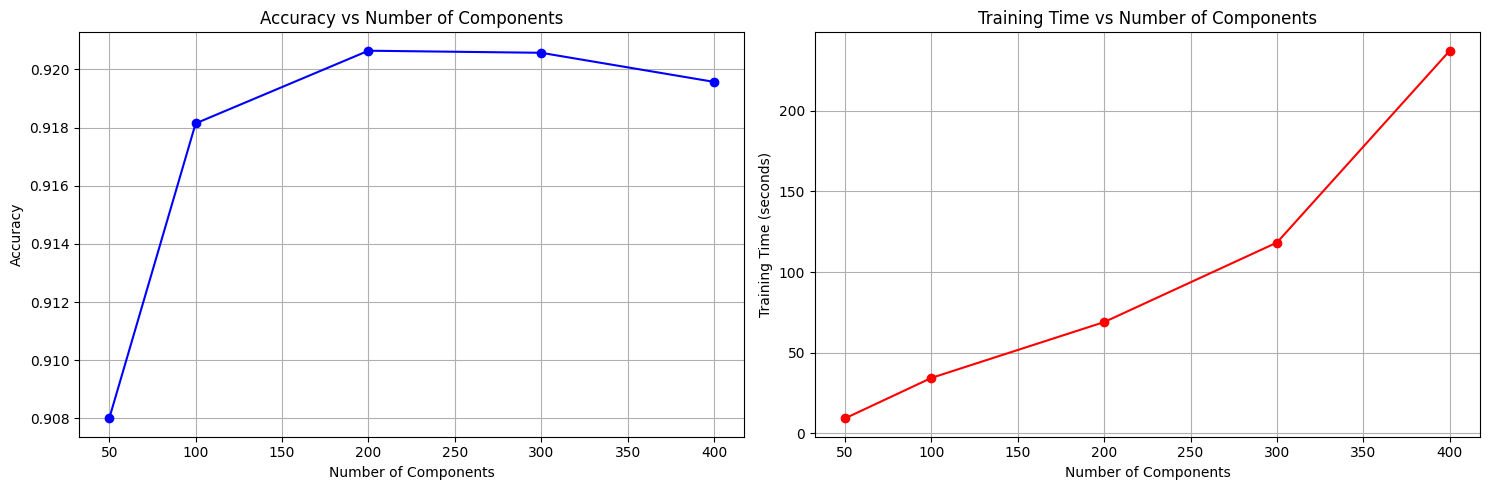

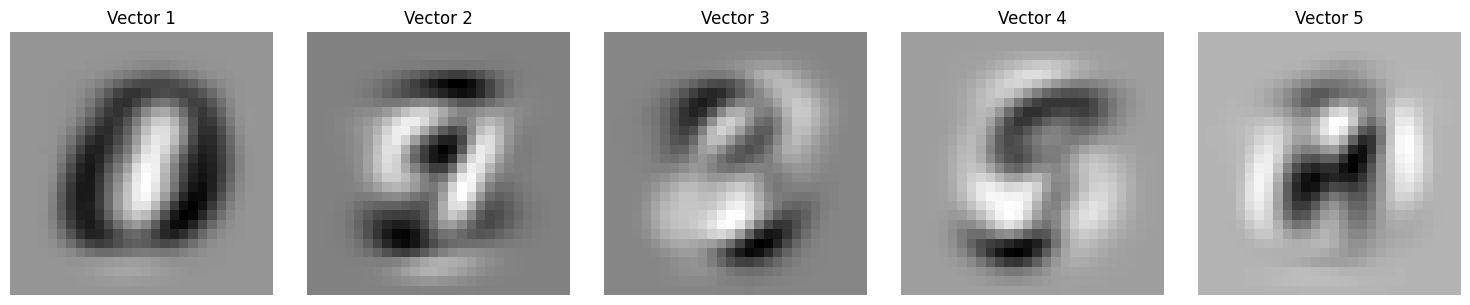

In [8]:
# Extract data from results for plotting
components = [r['n_components'] for r in results]
accuracies = [r['accuracy'] for r in results]
times = [r['training_time'] for r in results]

# Create figure for accuracy and training time plots
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, 'b-o')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')
plt.grid(True)

# Plot training time
plt.subplot(1, 2, 2)
plt.plot(components, times, 'r-o')
plt.xlabel('Number of Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Number of Components')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize top 5 singular vectors from the result with the highest accuracy
best_accuracy_idx = accuracies.index(max(accuracies))
best_singular_vectors = results[best_accuracy_idx]['singular_vectors']

# Create figure for singular vectors visualization
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    vector = best_singular_vectors[:, i].reshape(28, 28)
    plt.imshow(vector, cmap='gray')
    plt.axis('off')
    plt.title(f'Vector {i+1}')
plt.tight_layout()
plt.show()

## Part 6: Analyze / Conclusion 

# Analysis of SVD Preprocessing on MNIST with Logistic Regression

1. Performance Analysis:
   - Number of components tested: [50, 100, 200, 300, 400]
   - Best accuracy achieved: 0.9206 (tied between 200 and 300 components)
   - Worst accuracy: 0.9080 with 50 components
   - Time range: 9.26s to 237.30s seconds
   
   Detailed Results:
   | Components | Accuracy | Training Time |
   |------------|----------|---------------|
   | 50         | 0.9080   | 9.26s        |
   | 100        | 0.9181   | 34.35s       |
   | 200        | 0.9206   | 69.00s       |
   | 300        | 0.9206   | 118.33s      |
   | 400        | 0.9196   | 237.30s      |

2. Accuracy vs Dimensionality Trade-off:
   - The accuracy shows three distinct phases:
     * Rapid improvement: 50 → 100 components (0.9080 to 0.9181, +0.0101)
     * Final improvement: 100 → 200 components (0.9181 to 0.9206, +0.0025)
     * Plateau/Decline: 200+ components (no improvement, slight decline at 400)
   - Clear diminishing returns after 200 components:
     * 200 → 300: No accuracy improvement despite 50% more components
     * 300 → 400: Slight accuracy decrease (-0.001)
   - The improvement from 100 to 200 components is relatively small (+0.0025), suggesting that most critical features are captured within the first 100 components

3. Training Time Considerations:
   - Training time increases non-linearly with component count:
     * 50 → 100: 3.7x increase (25.09s more)
     * 100 → 200: 2.0x increase (34.64s more)
     * 200 → 300: 1.7x increase (49.34s more)
     * 300 → 400: 2.0x increase (118.97s more)
   - The relationship between components and time is approximately quadratic
   - Most notable jump in training time occurs between 300 and 400 components (118.97s increase)

4. Optimal Configuration:
   Based on the above analysis, I recommend using 200 components because:
   - Accuracy justification:
     * Achieves maximum accuracy (0.9206)
     * Additional components provide no accuracy benefit
   - Time efficiency justification:
     * 69.00s training time is reasonable
     * Saves 49.33s compared to 300 components and 168.30s compared to 400 components
     * 3.4x faster than using 400 components with better accuracy
   - Trade-off consideration:
     * Perfect sweet spot where accuracy peaks and time remains manageable
     * Further components only add computational overhead

5. Additional Observations:
   - The identical accuracy at 200 and 300 components (0.9206) suggests we've reached the model's inherent capability limit
   - The slight accuracy decrease at 400 components (0.9196) might indicate minor overfitting
   - Training time increases become more severe with higher dimensions:
     * First 50 components: ~0.19s per component
     * Last 100 components (300-400): ~1.19s per component
   - The efficiency of SVD is demonstrated by achieving 92.06% accuracy with just 25.5% (200/784) of the original dimensions

Practical Recommendations:
1. Resource-constrained scenarios: Use 100 components
   - Achieves 0.9181 accuracy (only 0.0025 below best)
   - Reasonable training time of 34.35s
   - Best balance of accuracy vs. computational cost

2. Accuracy-focused scenarios: Use 200 components
   - Achieves maximum accuracy of 0.9206
   - Avoids unnecessary computation of 300+ components
   - Training time still manageable at 69.00s

3. Never recommended: 300+ components
   - No accuracy improvement over 200 components
   - Significantly higher computational cost
   - Potential risk of slight performance degradation

In [9]:
# Print key metrics to help with analysis
best_result = max(results, key=lambda x: x['accuracy'])
worst_result = min(results, key=lambda x: x['accuracy'])
fastest_result = min(results, key=lambda x: x['training_time'])
slowest_result = max(results, key=lambda x: x['training_time'])

print("\nKey Metrics for Analysis:")
print(f"Best accuracy: {best_result['accuracy']:.4f} with {best_result['n_components']} components")
print(f"Worst accuracy: {worst_result['accuracy']:.4f} with {worst_result['n_components']} components")
print(f"Fastest training: {fastest_result['training_time']:.4f}s with {fastest_result['n_components']} components")
print(f"Slowest training: {slowest_result['training_time']:.4f}s with {slowest_result['n_components']} components")


Key Metrics for Analysis:
Best accuracy: 0.9206 with 200 components
Worst accuracy: 0.9080 with 50 components
Fastest training: 9.2593s with 50 components
Slowest training: 237.3018s with 400 components
